In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

# etc...

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [3]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
# Eliminamos las columnas ID,Listing URL, ScarpeID,Last Scraped... todas las columnas que nos nos aportan información relevante. 

eliminar_col=['ID','Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Neighborhood Overview',
              'Space', 'Description', 'Notes' ,'Transit', 'Access', 'Interaction', 'House Rules',
              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
              'Host Name', 'Host Location', 'Host About', 'Host Thumbnail Url','Host Picture Url', 
              'Host Neighbourhood', 'Host Listings Count','Host Total Listings Count','Street','State', 'Zipcode',
                'Market', 'Smart Location', 'Calendar last Scraped', 'First Review', 'Last Review','Calculated host listings count', 'Reviews per Month', 'Geolocation','Features'
             ]

df.drop(eliminar_col, axis=1, inplace=True)


In [5]:
#vamos a ver qué valores únicos hay por columna
df.nunique()

Experiences Offered                 5
Host Since                       2043
Host Response Time                  4
Host Response Rate                 67
Host Acceptance Rate               10
Host Verifications                191
Neighbourhood                     351
Neighbourhood Cleansed            444
Neighbourhood Group Cleansed       47
City                              222
Country Code                       18
Country                            17
Latitude                        11824
Longitude                       11824
Property Type                      21
Room Type                           3
Accommodates                       16
Bathrooms                          17
Bedrooms                           10
Beds                               16
Bed Type                            5
Amenities                       10077
Square Feet                        89
Price                             345
Weekly Price                      357
Monthly Price                     521
Security Dep

In [6]:
#Country y Country_code arrojan una info similar...
eliminar_col_extra=['Country','Review Scores Accuracy']

df.drop(eliminar_col_extra, axis=1, inplace=True)

In [7]:
#hay que ver qué columnas tienen valores nulos y cuántos son
df.isnull().sum()

Experiences Offered                 0
Host Since                          3
Host Response Time               1507
Host Response Rate               1507
Host Acceptance Rate            11794
Host Verifications                  4
Neighbourhood                    4159
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      818
City                                4
Country Code                        0
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          44
Bedrooms                           20
Beds                               37
Bed Type                            0
Amenities                         141
Square Feet                     11350
Price                              15
Weekly Price                     8943
Monthly Price                    8955
Security Deposit                 6772
Cleaning Fee

In [8]:
#vemos que hay 3 tipos de barrios donde NC y NGC presentan diferencias. Donde uno presenta más valores únicos, el otro presenta más NAs. Habrá que realizar un "merge" de ambos campos y generar uno nuevo.
#Para esto, vamos a rellenar los NAs de de NGC con la info de NC. 

df['Neighbourhood New']= df['Neighbourhood Group Cleansed'].fillna(df['Neighbourhood Cleansed'])

barrios_elim=['Neighbourhood Group Cleansed','Neighbourhood Group Cleansed','Neighbourhood']
df.drop(barrios_elim, axis=1, inplace=True)




In [9]:
#Eliminamos aquellas columnas que tienen muchos valores nulos...
eliminar_col_nulos=['License','Jurisdiction Names','Square Feet','Host Acceptance Rate']

df.drop(eliminar_col_nulos, axis=1, inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10317.0,94.803722,15.247078,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000
Weekly Price,2881.0,378.437348,194.751472,70.000000,220.000000,350.000000,500.000000,999.000000
Monthly Price,2869.0,1432.390728,1236.992934,250.000000,720.000000,1200.000000,1750.000000,25000.000000


In [11]:
df.shape
df.dtypes


Experiences Offered             object
Host Since                      object
Host Response Time              object
Host Response Rate             float64
Host Verifications              object
Neighbourhood Cleansed          object
City                            object
Country Code                    object
Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Amenities                       object
Price                          float64
Weekly Price                   float64
Monthly Price                  float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights           

In [12]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 15 columns):
Experiences Offered       11824 non-null object
Host Since                11821 non-null object
Host Response Time        10317 non-null object
Host Verifications        11820 non-null object
Neighbourhood Cleansed    11824 non-null object
City                      11820 non-null object
Country Code              11824 non-null object
Property Type             11824 non-null object
Room Type                 11824 non-null object
Bed Type                  11824 non-null object
Amenities                 11683 non-null object
Calendar Updated          11824 non-null object
Has Availability          9 non-null object
Cancellation Policy       11824 non-null object
Neighbourhood New         11824 non-null object
dtypes: object(15)
memory usage: 1.4+ MB


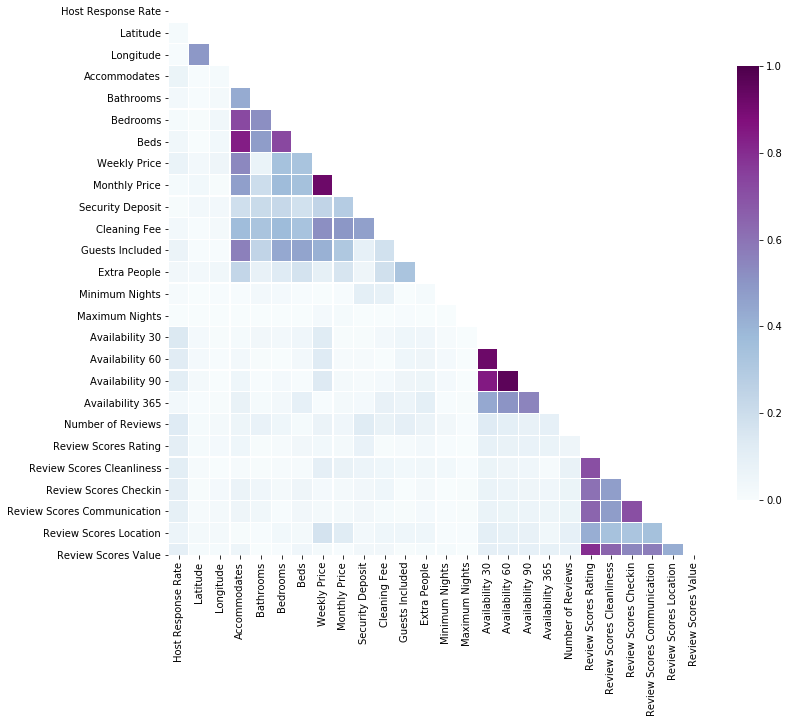

In [13]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="BuPu", cbar_kws={"shrink": .8})

plt.show()

In [14]:
df.corr() # realizo la matriz de correlación para asegurar "el tiro". 

,Host Response Rate,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Weekly Price,Monthly Price,...,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
Host Response Rate,1.000000,-0.019138,0.006854,0.065430,-0.027406,0.017044,0.041239,0.005843,0.071028,0.018291,...,-0.121759,-0.109760,-0.028611,0.130260,0.107322,0.112881,0.106503,0.097228,0.060017,0.101076
Latitude,-0.019138,1.000000,-0.493585,0.006899,-0.006339,-0.010066,0.000534,-0.013221,-0.030117,-0.031567,...,-0.022806,-0.025122,-0.006911,0.018777,-0.016659,-0.015340,-0.008932,-0.014522,-0.023521,-0.016840
Longitude,0.006854,-0.493585,1.000000,0.018478,0.027128,0.039596,0.034312,0.004976,-0.053010,-0.008552,...,0.004824,-0.000284,-0.008742,-0.023857,-0.019877,-0.003844,-0.019938,-0.025431,-0.026176,-0.019351
Accommodates,0.065430,0.006899,0.018478,1.000000,0.432238,0.722825,0.837461,0.528380,0.542439,0.470507,...,-0.027591,-0.047157,0.078856,0.057135,-0.048683,-0.014938,-0.069298,-0.051529,0.011398,-0.055966
Bathrooms,-0.027406,-0.006339,0.027128,0.432238,1.000000,0.523241,0.478647,0.379419,0.071403,0.202552,...,0.009347,-0.006135,0.017988,-0.077081,0.010758,0.008362,-0.043889,-0.042465,0.005242,-0.003680
Bedrooms,0.017044,-0.010066,0.039596,0.722825,0.523241,1.000000,0.728059,0.492316,0.346988,0.374822,...,0.001848,-0.022306,0.027786,-0.046992,0.013665,0.012273,-0.025612,-0.007607,-0.031293,-0.006140
Beds,0.041239,0.000534,0.034312,0.837461,0.478647,0.728059,1.000000,0.438198,0.334200,0.348226,...,0.027847,0.004447,0.091545,0.016142,-0.038421,-0.012642,-0.051009,-0.035754,-0.025689,-0.043639
Price,0.005843,-0.013221,0.004976,0.528380,0.379419,0.492316,0.438198,1.000000,0.880469,0.827679,...,0.064655,0.032864,0.057354,-0.055834,0.061904,0.078627,-0.011208,0.005208,0.102186,0.015110
Weekly Price,0.071028,-0.030117,-0.053010,0.542439,0.071403,0.346988,0.334200,0.880469,1.000000,0.924147,...,-0.131472,-0.135228,0.004065,0.070187,0.034868,0.099825,0.021963,0.025166,0.169572,0.026736
Monthly Price,0.018291,-0.031567,-0.008552,0.470507,0.202552,0.374822,0.348226,0.827679,0.924147,1.000000,...,-0.013218,-0.025487,0.027078,0.045922,0.026781,0.080682,-0.026120,-0.026478,0.125172,0.005326


In [15]:
#vamos a quitar los valores con una correlación mayor a 0.9 por ser posible fuente de error. Y los menores a 0.6 por tener una correlación bastante baja

eliminar_col_correl=['Latitude','Longitude','Minimum Nights','Maximum Nights','Number of Reviews','Availability 30','Availability 60','Availability 90','Availability 365']

df.drop(eliminar_col_correl, axis=1, inplace=True)

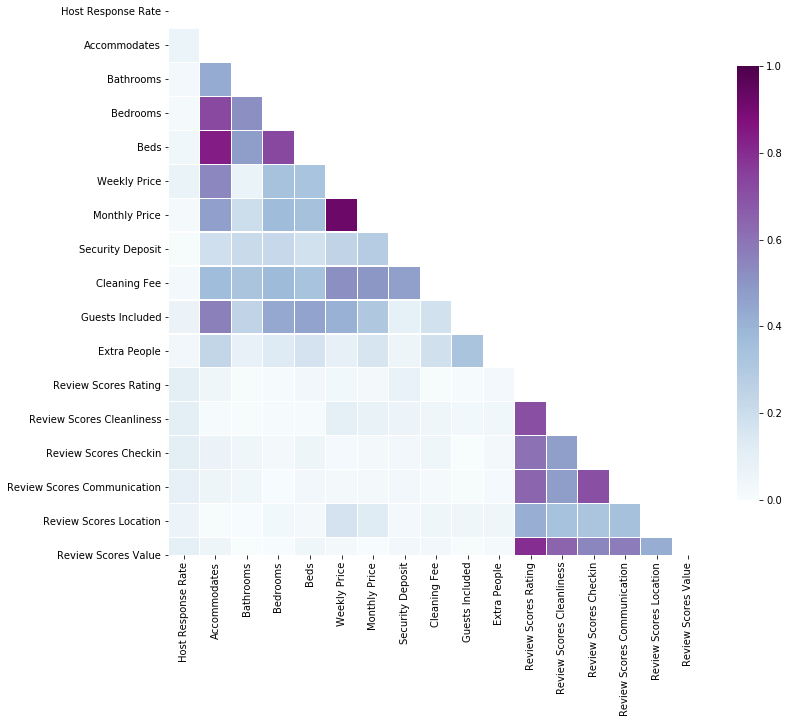

In [16]:

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="BuPu", cbar_kws={"shrink": .8})

plt.show()

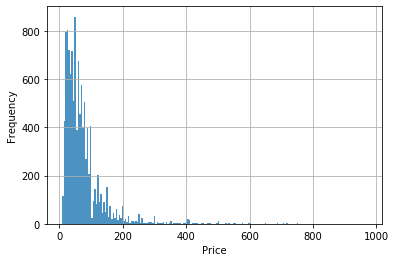

In [17]:
df['Price'].plot.hist(alpha=0.8, bins=200, grid = True)
plt.xlabel('Price')
plt.show()

In [18]:
#Con esta gráfica vemos que, a partir de 150/160 €, los valores son atípicos por lo que tendremos que aplicar un filtro a partir de ese precio para reducir la aparición de estos valores